# Problem 0 - Jhanvi

As we have covered in class, we are training a logistic regression model to predict if
someone will click on an advertisement. Consider the logistic regression model with 3 features and
weights w = [1, −30, 3]. For the dataset with features x1=[20,0,0], y1=1 and x2=[23,1,1], y2=0,
•Compute the probabilities that the logistic regression assigns to these two customers clicking
on the advertisement (i.e. y=1)
•Compute the cross entropy loss of this logistic regression.
•Design a decision stump (a decision tree of depth 1) that splits on the first feature. What is
the Gini impurity of the root? What is the Gini impurity after the best split that you find?

# Problem 1: Logistic Regression and CIFAR-10. - Jhanvi
In this problem you will explore the dataset
CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You
will also explore visualizing the solution.

(Optional) You can read about the CIFAR-10 and CIFAR-100 datasets here: https://www.
cs.toronto.edu/~kriz/cifar.html.
•(Optional) OpenML curates a number of data sets. You will use a subset of CIFAR-10
provided by them. Read here for a description: https://www.openml.org/d/40926.
•Use the fetch openml command from sklearn.datasets to import the CIFAR-10-Small
data set.
•Figure out how to display some of the images in this data set, and display a couple. While
not high resolution, these should be recognizable if you are doing it correctly.
•There are 20,000 data points. Do a train-test split on 3/4 - 1/4.
•You will run multi-class logistic regression on these using the cross entropy loss. You have to
specify this specifically (multi class=’multinomial’). Use cross validation to see how good
your accuracy can be. In this case, cross validate to find as good regularization coefficients
as you can, for ℓ1 and ℓ2 regularization (called penalties), which are naturally supported in
sklearn.linear model.LogisticRegression. I recommend you use the solver saga.
•Report your training and test loss from above,
•How sparse can you make your solutions without deteriorating your testing error too much?
Here, we ask for a sparse solution that has test accuracy that is close to the best solution you
found.

# Problem 2: Multi-class Logistic Regression – Visualizing the Solution.  - Josh
You will repeat
the previous problem but for the MNIST dataset which you will find here: https://www.openml.
org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image
recognition problems in computer vision. We will see here how well logistic regression does, as you
did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and
that in connection to this, sparsity can be useful.
•Use the fetch openml command from sklearn.datasets to import the MNIST data set,
•Choose a reasonable train-test split, and again run multi-class logistic regression on these
using the cross entropy loss, as you did above. Try to optimize the hyperparameters.
•Report your training and test loss from above,
•Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as
good accuracy.
•Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimen-
sion as the data. Therefore we can pretend that the coefficients of the solution are an image
of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to
the 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look
like the digits they are classifying.

In [1]:
from sklearn import preprocessing
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
print(mnist.keys())
X, y = mnist['data'], mnist['target']

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


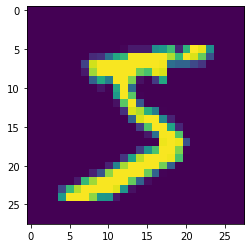

In [5]:
digit = X.iloc[0]
digit_pixels = np.array(digit).reshape(28,28)
plt.imshow(digit_pixels)

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=0)

80:20 Train test split

In [9]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [18]:
best_model_LR = LogisticRegression(max_iter = 100, multi_class='multinomial', solver='saga', tol = 0.1, penalty="none")
#best_model_LR = GridSearchCV(model_LR, param_grid=param_grid, cv=4, verbose=True, n_jobs=-1)
best_model_LR.fit(X_train, Y_train)
#best_model_LR.best_estimator_
score = best_model_LR.score(X_valid, Y_valid)
print(score)

c:\Users\Joshd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.9172142857142858


We get a score of 0.917 with multi class logistic regression

In [15]:
model_LR_L1 = LogisticRegression(max_iter = 100, multi_class='multinomial', solver='saga', tol = 0.1, penalty="l1")
model_LR_L1.fit(X_train, Y_train)
score_L1 = model_LR_L1.score(X_valid, Y_valid)
print(score_L1)

0.9163571428571429


We get a score of 0.916 using L1 regularizer

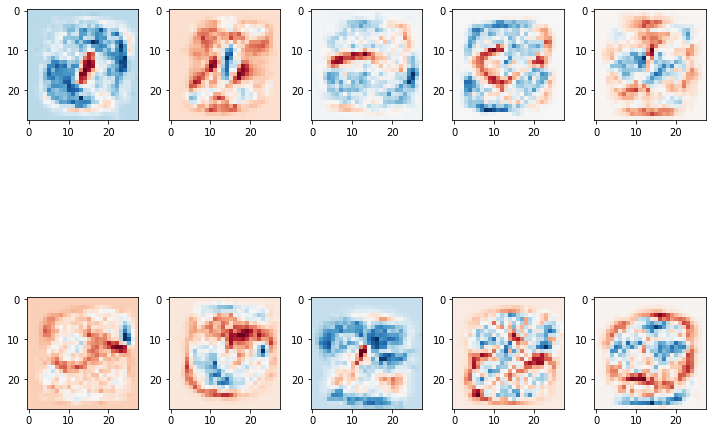

In [36]:
from matplotlib.pyplot import gray
wmatrix = model_LR.coef_
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,10))
a = 0
for i,ax in enumerate(axes.flat, start=1):
    ax.imshow(wmatrix[a].reshape(28,28),cmap=plt.cm.RdBu)
    a=a+1
fig.tight_layout()
plt.show()

# Problem 3: Revisiting Logistic Regression and MNIST. - Josh
Here we throw the kitchen sink of classical ML (i.e. pre-deep learning) on MNIST.
•Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross
Validation to find the best settings. How well can you do? You should use the accuracy
metric to compare to logistic regression. What are the hyperparameters of your best model?
•Use Gradient Boosting to do the same. Try your best to tune your hyper parameters. What
are the hyperparameters of your best model?

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [24]:
model_RF = RandomForestClassifier(n_estimators = 100, bootstrap=True, n_jobs=4, criterion = 'entropy')
model_RF.fit(X_train,Y_train)
CV_score = cross_val_score(model_RF, X_train, Y_train, cv=4, scoring='accuracy')
print(CV_score)
print(CV_score.mean())

[0.966      0.965      0.96607143 0.96542857]
0.965625


Best Parameters for RF: n_estimators = 100, bootstrap=True, n_jobs=4, criterion = 'entropy'

In [26]:
model_GB = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
model_GB.fit(X_train,Y_train, early_stopping_rounds=5,eval_set=[(X_valid, Y_valid)], verbose=True)

c:\Users\Joshd\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:2.13295
[1]	validation_0-mlogloss:1.99282
[2]	validation_0-mlogloss:1.87307
[3]	validation_0-mlogloss:1.76655
[4]	validation_0-mlogloss:1.67228
[5]	validation_0-mlogloss:1.58868
[6]	validation_0-mlogloss:1.51343
[7]	validation_0-mlogloss:1.44414
[8]	validation_0-mlogloss:1.38087
[9]	validation_0-mlogloss:1.32150
[10]	validation_0-mlogloss:1.26724
[11]	validation_0-mlogloss:1.21662
[12]	validation_0-mlogloss:1.16966
[13]	validation_0-mlogloss:1.12520
[14]	validation_0-mlogloss:1.08349
[15]	validation_0-mlogloss:1.04408
[16]	validation_0-mlogloss:1.00719
[17]	validation_0-mlogloss:0.97239
[18]	validation_0-mlogloss:0.93994
[19]	validation_0-mlogloss:0.90905
[20]	validation_0-mlogloss:0.87938
[21]	validation_0-mlogloss:0.85090
[22]	validation_0-mlogloss:0.82375
[23]	validation_0-mlogloss:0.79821
[24]	validation_0-mlogloss:0.77400
[25]	validation_0-mlogloss:0.75029
[26]	validation_0-mlogloss:0.72824
[27]	validation_0-mlogloss:0.70689
[28]	validation_0-mlogloss:0.6

KeyboardInterrupt: 

In [ ]:
CV_score_GB = cross_val_score(model_RF, X_valid, Y_valid, cv=4, scoring='accuracy')
print(CV_score_GB)
print(CV_score_GB.mean())

[0.96507143 0.96528571 0.96735714 0.9665    ]
0.9660535714285714


Best Parameters for XGB: n_estimators=1000, learning_rate=0.05, n_jobs=4, Early_stopping_rounds = 5

# Problem 4: Revisiting Logistic Regression and CIFAR-10. - Jackson
As before, we’ll throw the kitchen sink of classical ML (i.e. pre-deep learning) on CIFAR-10.  
Keep in mind that CIFAR-10 is a few times larger.
* What is the best accuracy you can get on the test data, by tuning Random Forests? 
    * What are the hyperparameters of your best model?
* What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? 
    * What are the hyperparameters of your best model?

In [5]:
#Imports 

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import sklearn.ensemble
import pandas as pd
import numpy as np


In [2]:
#Feature Functions
"""
display_image_grid(...)

SUMMARY
-------
    Given a dataset, either mnist or cifar, show a grid of randomly selected images and their labels

PARAMETERS
----------
    dataset: dict
        dictionary of data information
        REQUIRED KEYS:
            - data := pd.Dataframe containing pixel information in either rgb or grayscale
            - target := true classification
        OPTIONAL KEYS:
            - categories := dictionary mapping from classification target to human text

    grid_width: int
        Number of columns in the grid

    grid_height: int
        Number of rows in the grid

    img_width: int
        width of the image in pixels

    img_height: int
        Height of the image in pixels, likely the same as img_width

    figsize: float
        Size of each image in the grid

    _format: {'RGB', 'grayscale'}
        The format of the images
RETURNS
-------
    None

OUTPUTS
-------
    A 'grid_width' by 'grid_height' grid of images from 'dataset'

"""
def display_image_grid(dataset, 
                        grid_width  = 5,
                        grid_height = 5, 
                        img_width   = 32,
                        img_height  = 32,
                        figsize = 2.0,
                        _format = 'RGB'):
    fig, ax = plt.subplots(grid_height, grid_width, figsize=(figsize*grid_width, figsize*grid_height), facecolor='gray')

    for m in range(grid_height):
        for n in range(grid_width):
            i = np.random.choice(len(dataset['data']))
            ax[m][n].set_axis_off()
            
            if type(dataset['categories']) == dict:
                ax[m][n].set_title('%s: %s'%(i,dataset['categories'][dataset['target'].iloc[i]]))
            else:
                ax[m][n].set_title('%s: %s'%(i, dataset['target'].iloc[i]))

            im = np.array(dataset['data'].iloc[i]).astype('uint8')
            if _format == 'RGB':
                im = im.reshape((img_width, img_height, 3), order='F')
                im = np.swapaxes(im, 0, 1)
                ax[m][n].imshow(im)

            elif _format == 'grayscale':
                im = im.reshape((img_width, img_height), order='F')
                im = np.swapaxes(im, 0, 1)
                ax[m][n].imshow(im, cmap='gray')
            else:
                raise Exception('_format MUST be either RGB or grayscale')


In [3]:
cifar = fetch_openml('cifar_10')
cifar['categories'] = {
    '0' : 'airplane',
    '1' : 'automobile',
    '2' : 'bird',
    '3' : 'cat',
    '4' : 'deer',
    '5' : 'dog',
    '6' : 'frog',
    '7' : 'horse',
    '8' : 'ship',
    '9' : 'truck',
}

In [4]:
#Split the data into train and test, making sure to have the same random state for both (otherwise would have to join, perform the split, then unjoin the target / use the frame then unjoin the target)
cifar_X_train, cifar_X_test = train_test_split(cifar['data'], test_size=0.25, random_state=0) 
cifar_y_train, cifar_y_test = train_test_split(cifar['target'], test_size=0.25, random_state=0)

In [ ]:
#Visualization of some of the data in the train set
train = {
    'data': cifar_X_train,
    'target': cifar_y_train,
    'categories': cifar['categories']
}

display_image_grid(train, grid_width = 5, grid_height = 3, figsize=3)

In [ ]:
from sklearn.model_selection import GridSearchCV

#WARNING - Since I tested some pretty in depth random forests, this takes a LONG TIME to run (8+hrs), for the turned in notebook many of the parameters options have been reduced to aid runtime. 
n_estimators = [8, 16]   #Shorten to only 2, 4, and 8 to reduce runtime
max_depth = [None, 2, 4]
max_features = ['sqrt']       

params = {'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features}

rfc = sklearn.ensemble.RandomForestClassifier()
rfc = GridSearchCV(rfc, params, verbose=2)
search_results = rfc.fit(cifar_X_train, cifar_y_train)

In [ ]:
# Best results from grid search, not a great way to look at the data
print('Training Accuracy:\t%s\nTesting Accuracy:\t%s'%(search_results.best_estimator_.score(cifar_X_train, cifar_y_train), search_results.best_estimator_.score(cifar_X_test, cifar_y_test)))
print('Params: %s' %(search_results.best_params_))

In [12]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax')
xgb_model.fit(cifar_X_train, cifar_y_train.astype('uint8'))


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [19]:
print(xgb_model.score(cifar_X_test, cifar_y_test.astype('uint8')))

0.5340666666666667


# Problem 5: Getting Started with Pytorch. - Jackson
 * Install Pytorch.
 * Work through this tutorial to familiarize yourself with Pytorch basics: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
 * Work through this tutorial on MNIST starting from a Pytorch logistic regression and building to a CNN using torch.nn. Use a GPU (e.g. on Colab, through Google Cloud credits, Pa-perspace, or any other way). https://pytorch.org/tutorials/beginner/nn_tutorial.html
 * Design the best CNN you can to get the best accuracy on MNIST.

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.nn.functional import cross_entropy

c:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


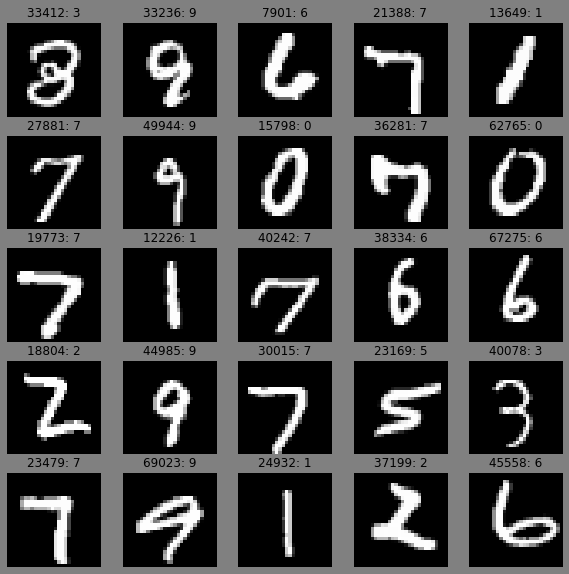

In [322]:
mnist = fetch_openml('mnist_784')
display_image_grid(mnist, img_height=28, img_width=28, _format='grayscale')

In [325]:
mnist_X_train, mnist_X_test = train_test_split(mnist['data'], test_size=0.25, random_state=0) 
mnist_y_train, mnist_y_test = train_test_split(mnist['target'], test_size=0.25, random_state=0)

mnist_X_train = mnist_X_train.astype('float').to_numpy()
mnist_X_test = mnist_X_test.astype('float').to_numpy()
mnist_y_train = mnist_y_train.astype('float').to_numpy()
mnist_y_test = mnist_y_test.astype('float').to_numpy()

x_train, y_train, x_test, y_test = map(
    torch.tensor, (mnist_X_train,
     mnist_y_train, 
     mnist_X_test, 
     mnist_y_test)
)

y_test = y_test.to(torch.long)
y_train = y_train.to(torch.long)

In [48]:
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)

def preprocess_cifar(x, y):
    return x.view(-1, 3, 32, 32).to(dev), y.to(dev)

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    res = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_dl:
            loss, num = loss_batch(model, loss_func, xb, yb, opt)
            train_loss += loss

        model.eval()
        with torch.no_grad():
            losses = []
            nums = []
            accuracies = []
            for xb, yb in valid_dl:
                loss, num = loss_batch(model, loss_func, xb, yb)
                acc = (model(xb).argmax(axis=1) == yb).to(torch.float).sum()
                losses.append(loss)
                nums.append(num)
                accuracies.append(acc.item())
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        accuracy = np.sum(accuracies) / np.sum(nums)

        print(f'Epoch {epoch}:\n\tTraining Loss: {train_loss}\n\tTest Loss: {val_loss}\n\tTest Hardmax Accuracy: {accuracy}')
        #yield (epoch, train_loss, val_loss, accuracy)
        res.append({
            'epoch':epoch,
            'train_loss':train_loss,
            'test_loss':val_loss,
            'test_acc':accuracy})
    return res



In [327]:
train_dl = DataLoader(TensorDataset(x_train, y_train), batch_size= 64)
test_dl = DataLoader(TensorDataset(x_test, y_test), batch_size = 64)
train_dl = WrappedDataLoader(train_dl, preprocess)
test_dl = WrappedDataLoader(test_dl, preprocess)

In [328]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model.to(dev)

opt = optim.SGD(model.parameters(), lr=0.0005, momentum=0.9)



In [329]:
fit(15, model, cross_entropy, opt, train_dl, test_dl)

Epoch 0:
	Test Loss: 0.4967031355381012
	Test Hardmax Accuracy: 0.8549714285714286
Epoch 1:
	Test Loss: 0.3671825410774776
	Test Hardmax Accuracy: 0.8956
Epoch 2:
	Test Loss: 0.31904739453451975
	Test Hardmax Accuracy: 0.9091428571428571
Epoch 3:
	Test Loss: 0.28789241268294197
	Test Hardmax Accuracy: 0.9172571428571429
Epoch 4:
	Test Loss: 0.2718743943010058
	Test Hardmax Accuracy: 0.9217714285714286
Epoch 5:
	Test Loss: 0.25874228255067555
	Test Hardmax Accuracy: 0.9254857142857142
Epoch 6:
	Test Loss: 0.2467200424875532
	Test Hardmax Accuracy: 0.9282285714285714
Epoch 7:
	Test Loss: 0.23232349655287607
	Test Hardmax Accuracy: 0.9321714285714285
Epoch 8:
	Test Loss: 0.221123917388916
	Test Hardmax Accuracy: 0.9348571428571428
Epoch 9:
	Test Loss: 0.2097619413307735
	Test Hardmax Accuracy: 0.9369142857142857
Epoch 10:
	Test Loss: 0.1996449837378093
	Test Hardmax Accuracy: 0.9398285714285715
Epoch 11:
	Test Loss: 0.19022965362071992
	Test Hardmax Accuracy: 0.9425714285714286
Epoch 12:


# Problem 6: CNNs for CIFAR-10. - Jackson
* Build a CNN and optimize the accuracy for CIFAR-10. 
    * Try different number of layers and different architectures (depth and convolutional filter hyperparameters).
* Is momentum and learning rate having a significant effect? 
    * Track the train and test loss across training epochs and plot them for different learning rates and momentum values.
* Is the depth of the CNN having a significant effect on performance? 
    * Describe the hyperparameters of the best model you could train.

In [3]:
cifar = fetch_openml('cifar_10')
cifar['categories'] = {
    '0' : 'airplane',
    '1' : 'automobile',
    '2' : 'bird',
    '3' : 'cat',
    '4' : 'deer',
    '5' : 'dog',
    '6' : 'frog',
    '7' : 'horse',
    '8' : 'ship',
    '9' : 'truck',
}

In [6]:
#Split the data into train and test, making sure to have the same random state for both (otherwise would have to join, perform the split, then unjoin the target / use the frame then unjoin the target)
cifar_X_train, cifar_X_test = train_test_split(cifar['data'], test_size=0.25, random_state=0) 
cifar_y_train, cifar_y_test = train_test_split(cifar['target'], test_size=0.25, random_state=0)

cifar_X_train = cifar_X_train.astype('float').to_numpy()
cifar_X_test = cifar_X_test.astype('float').to_numpy()
cifar_y_train = cifar_y_train.astype('float').to_numpy()
cifar_y_test = cifar_y_test.astype('float').to_numpy()

x_train, y_train, x_test, y_test = map(
    torch.tensor, (cifar_X_train,
     cifar_y_train, 
     cifar_X_test, 
     cifar_y_test)
)

y_train = y_train.to(torch.long)
y_test = y_test.to(torch.long)

In [7]:
train_dl = DataLoader(TensorDataset(x_train, y_train), batch_size= 64)
test_dl = DataLoader(TensorDataset(x_test, y_test), batch_size = 64)
train_dl = WrappedDataLoader(train_dl, preprocess_cifar)
test_dl = WrappedDataLoader(test_dl, preprocess_cifar)

In [8]:
cifar_model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

c_opt = optim.SGD(cifar_model.parameters(), lr=0.001, momentum=0.9)

In [13]:
data = fit(10, cifar_model, cross_entropy, c_opt, train_dl, test_dl)

Epoch 0:
	Training Loss: 946.8944481015205
	Test Loss: 1.4262865494410197
	Test Hardmax Accuracy: 0.4836
Epoch 1:
	Training Loss: 950.4156561493874
	Test Loss: 1.4235719729741414
	Test Hardmax Accuracy: 0.4815333333333333
Epoch 2:
	Training Loss: 948.6070455610752
	Test Loss: 1.416039202562968
	Test Hardmax Accuracy: 0.4828
Epoch 3:
	Training Loss: 945.9381285607815
	Test Loss: 1.419779781850179
	Test Hardmax Accuracy: 0.485
Epoch 4:
	Training Loss: 945.6666943430901
	Test Loss: 1.4184884017944337
	Test Hardmax Accuracy: 0.48546666666666666
Epoch 5:
	Training Loss: 944.6673718392849
	Test Loss: 1.4108435719172159
	Test Hardmax Accuracy: 0.48746666666666666
Epoch 6:
	Training Loss: 945.2371001839638
	Test Loss: 1.414729014523824
	Test Hardmax Accuracy: 0.4864
Epoch 7:
	Training Loss: 942.2428210675716
	Test Loss: 1.4025837495803832
	Test Hardmax Accuracy: 0.49006666666666665
Epoch 8:
	Training Loss: 941.4997672140598
	Test Loss: 1.4126408246358235
	Test Hardmax Accuracy: 0.4882
Epoch 9:

In [49]:
cifar_model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=1),
    nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1))
)

c_opt = optim.SGD(cifar_model.parameters(), lr=0.0005, momentum=0.75)
data = fit(200, cifar_model, cross_entropy, c_opt, train_dl, test_dl)

Epoch 0:
	Training Loss: 2994.3273820877075
	Test Loss: 4.001335272343954
	Test Hardmax Accuracy: 0.16546666666666668
Epoch 1:
	Training Loss: 2589.008008480072
	Test Loss: 3.507534501647949
	Test Hardmax Accuracy: 0.19066666666666668
Epoch 2:
	Training Loss: 2436.767923116684
	Test Loss: 3.4176973077138264
	Test Hardmax Accuracy: 0.21853333333333333
Epoch 3:
	Training Loss: 2371.2218129634857
	Test Loss: 3.1043885672251386
	Test Hardmax Accuracy: 0.25253333333333333
Epoch 4:
	Training Loss: 1874.0161536931992
	Test Loss: 2.602180548985799
	Test Hardmax Accuracy: 0.3112666666666667
Epoch 5:
	Training Loss: 1779.6579842567444
	Test Loss: 2.553745642217
	Test Hardmax Accuracy: 0.336
Epoch 6:
	Training Loss: 1735.7193917036057
	Test Loss: 2.493644749069214
	Test Hardmax Accuracy: 0.3604
Epoch 7:
	Training Loss: 1478.9611939191818
	Test Loss: 2.103521662648519
	Test Hardmax Accuracy: 0.3924666666666667
Epoch 8:
	Training Loss: 1297.8633912801743
	Test Loss: 1.625315157254537
	Test Hardmax 

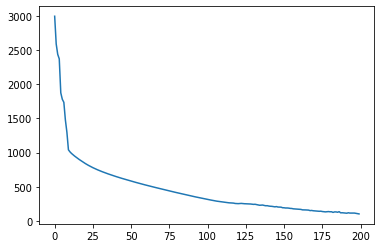

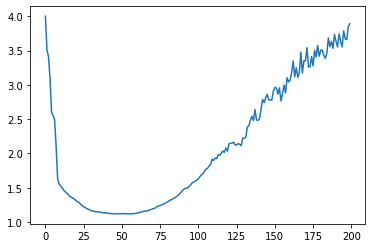

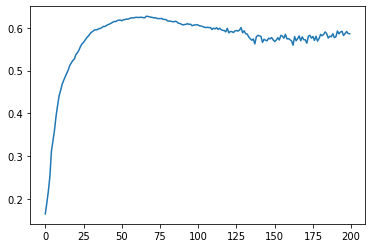

In [51]:
# 50 Epochs of training provide best fit for this architecture
plt.plot([x['epoch'] for x in data], [x['train_loss'] for x in data])
plt.show()
plt.plot([x['epoch'] for x in data], [x['test_loss'] for x in data])
plt.show()
plt.plot([x['epoch'] for x in data], [x['test_acc'] for x in data])
plt.show()


In [60]:
cifar_model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=1),
    nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1))
)

c_opt = optim.SGD(cifar_model.parameters(), lr=0.002, momentum=0.94)
data = fit(10, cifar_model, cross_entropy, c_opt, train_dl, test_dl)

Epoch 0:
	Training Loss: 1849.6416212320328
	Test Loss: 1.8471892587661742
	Test Hardmax Accuracy: 0.3318
Epoch 1:
	Training Loss: 1076.8049201965332
	Test Loss: 1.5663888025919597
	Test Hardmax Accuracy: 0.43906666666666666
Epoch 2:
	Training Loss: 975.9082400798798
	Test Loss: 1.379795999209086
	Test Hardmax Accuracy: 0.5098
Epoch 3:
	Training Loss: 896.7371234297752
	Test Loss: 1.2790597595214843
	Test Hardmax Accuracy: 0.549
Epoch 4:
	Training Loss: 832.7098210453987
	Test Loss: 1.280572717666626
	Test Hardmax Accuracy: 0.5478
Epoch 5:
	Training Loss: 792.7142083644867
	Test Loss: 1.2077262122790018
	Test Hardmax Accuracy: 0.5798
Epoch 6:
	Training Loss: 764.5586932301521
	Test Loss: 1.1553665983835857
	Test Hardmax Accuracy: 0.5995333333333334
Epoch 7:
	Training Loss: 725.4823226630688
	Test Loss: 1.1559717127799989
	Test Hardmax Accuracy: 0.6013333333333334
Epoch 8:
	Training Loss: 697.5043259263039
	Test Loss: 1.1521600332895914
	Test Hardmax Accuracy: 0.6067333333333333
Epoch 9

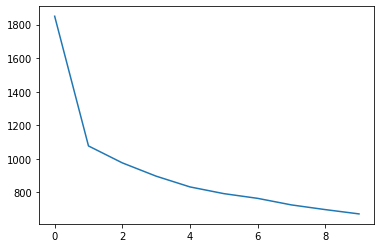

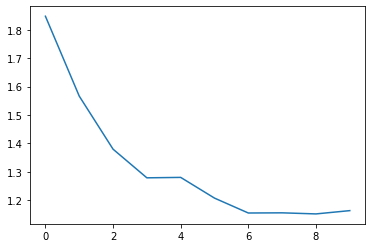

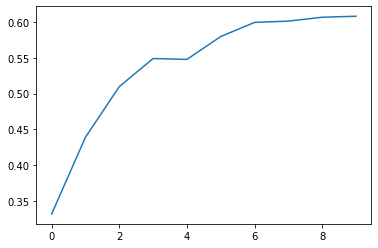

In [61]:
plt.plot([x['epoch'] for x in data], [x['train_loss'] for x in data])
plt.show()
plt.plot([x['epoch'] for x in data], [x['test_loss'] for x in data])
plt.show()
plt.plot([x['epoch'] for x in data], [x['test_acc'] for x in data])
plt.show()

# Takeaways

 - A lower learning rate produces better accuracy and lower loss, through more epochs
 - High momentum is needed with a low learning rate, else overfitting is certain
 - Early stopping is incredibly important to prevent overfitting

Final Parameters:
 - Learning rate: 0.00
 - Momentum: 0.94
 - Epochs: 10